In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [4]:
BASIC_PATH = os.getcwd()
BASIC_PATH

'C:\\Users\\EXC'

In [7]:
# os 별로 폰트를 다르게 설정해 줍니다.
if os.name == "posix":
    # Mac
    sns.set(font="Malgun Gothic")
elif os.name == "nt":
    # Window
    sns.set(font="Malgun Gothic")

In [8]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

In [14]:
df_raw = pd.read_csv("케이뷰티.csv", 
                     encoding="cp949")
df_raw.shape
# df_raw

(450, 32)

In [18]:
df_raw["국가(대륙)별"].unique()

array(['합계', '미국', '중국', '일본', '아세안(ASEAN)', '유럽연합(EU)', '중동', '중남미',
       '대양주', '기타'], dtype=object)

In [15]:
# "국가(대륙)별" 데이터 빈도수 세기
df_raw["국가(대륙)별"].value_counts()

합계            45
미국            45
중국            45
일본            45
아세안(ASEAN)    45
유럽연합(EU)      45
중동            45
중남미           45
대양주           45
기타            45
Name: 국가(대륙)별, dtype: int64

In [22]:
df_raw[df_raw["국가(대륙)별"] == "미국"].head()

,국가(대륙)별,상품군별,판매유형별,2014.1/4,2014.2/4,2014.3/4,2014.4/4,2015.1/4,2015.2/4,2015.3/4,...,2018.4/4,2019.1/4,2019.2/4,2019.3/4,2019.4/4,2020.1/4,2020.2/4,2020.3/4,2020.4/4,2021.1/4
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,...,48978,40985,44973,55512,54054,49162,66097,67920,73390,72577
46,미국,합계,면세점,-,-,-,-,-,-,-,...,2079,2657,2951,1818,1481,698,339,81,67,56
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,...,46899,38328,42022,53694,52573,48464,65758,67839,73323,72521
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,...,1774,1298,1408,1653,1383,1182,1631,1871,1373,1644
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,1,0,0,0,0,0,0,0,0,0


In [24]:
df = df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"], 
                 var_name="기간", value_name="million")
df

,국가(대륙)별,상품군별,판매유형별,기간,million
0,합계,합계,계,2014.1/4,148272
1,합계,합계,면세점,2014.1/4,-
2,합계,합계,면세점 이외,2014.1/4,-
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-
...,...,...,...,...,...
13045,기타,생활용품 및 자동차용품,면세점,2021.1/4,0
13046,기타,생활용품 및 자동차용품,면세점 이외,2021.1/4,343
13047,기타,기 타,계,2021.1/4,870
13048,기타,기 타,면세점,2021.1/4,0


In [26]:
df["기간"]

0        2014.1/4
1        2014.1/4
2        2014.1/4
3        2014.1/4
4        2014.1/4
           ...   
13045    2021.1/4
13046    2021.1/4
13047    2021.1/4
13048    2021.1/4
13049    2021.1/4
Name: 기간, Length: 13050, dtype: object

In [34]:
df["연도"] = df["기간"].map(lambda x: x.split(".")[0])
type(df["연도"][0])


str

In [30]:
a =int("2019 3/4 p)".split()[1].split("/")[0])
type(a)

int

In [35]:
df["분기"] = df["기간"].apply(lambda  x : x.split(".")[1].split("/")[0])
df["분기"] = df["분기"].astype(int)
df["연도"] = df["연도"].astype(int)
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
0,합계,합계,계,2014.1/4,148272,2014,1
1,합계,합계,면세점,2014.1/4,-,2014,1
2,합계,합계,면세점 이외,2014.1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-,2014,1


In [36]:
df["million"] = df["million"].replace("--", pd.np.nan).astype(float)
df

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_36348\908269325.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df["million"] = df["million"].replace("-", pd.np.nan).astype(float)


,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
0,합계,합계,계,2014.1/4,148272.0,2014,1
1,합계,합계,면세점,2014.1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014.1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1
...,...,...,...,...,...,...,...
13045,기타,생활용품 및 자동차용품,면세점,2021.1/4,0.0,2021,1
13046,기타,생활용품 및 자동차용품,면세점 이외,2021.1/4,343.0,2021,1
13047,기타,기 타,계,2021.1/4,870.0,2021,1
13048,기타,기 타,면세점,2021.1/4,0.0,2021,1


In [37]:
# 합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거합니다.
df = df[(df["국가(대륙)별"] != "합계") & (df["상품군별"] != "합계") & (df["판매유형별"] != "계")].copy()
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
49,미국,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014.1/4,NaN,2014,1
52,미국,가전·전자·통신기기,면세점,2014.1/4,NaN,2014,1
53,미국,가전·전자·통신기기,면세점 이외,2014.1/4,NaN,2014,1
55,미국,소프트웨어,면세점,2014.1/4,NaN,2014,1
...,...,...,...,...,...,...,...
13043,기타,농축수산물,면세점 이외,2021.1/4,1.0,2021,1
13045,기타,생활용품 및 자동차용품,면세점,2021.1/4,0.0,2021,1
13046,기타,생활용품 및 자동차용품,면세점 이외,2021.1/4,343.0,2021,1
13048,기타,기 타,면세점,2021.1/4,0.0,2021,1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7308 entries, 49 to 13049
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  7308 non-null   object 
 1   상품군별     7308 non-null   object 
 2   판매유형별    7308 non-null   object 
 3   기간       7308 non-null   object 
 4   million  4284 non-null   float64
 5   연도       7308 non-null   int32  
 6   분기       7308 non-null   int32  
dtypes: float64(1), int32(2), object(4)
memory usage: 399.7+ KB


In [39]:
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
million    3024
연도            0
분기            0
dtype: int64

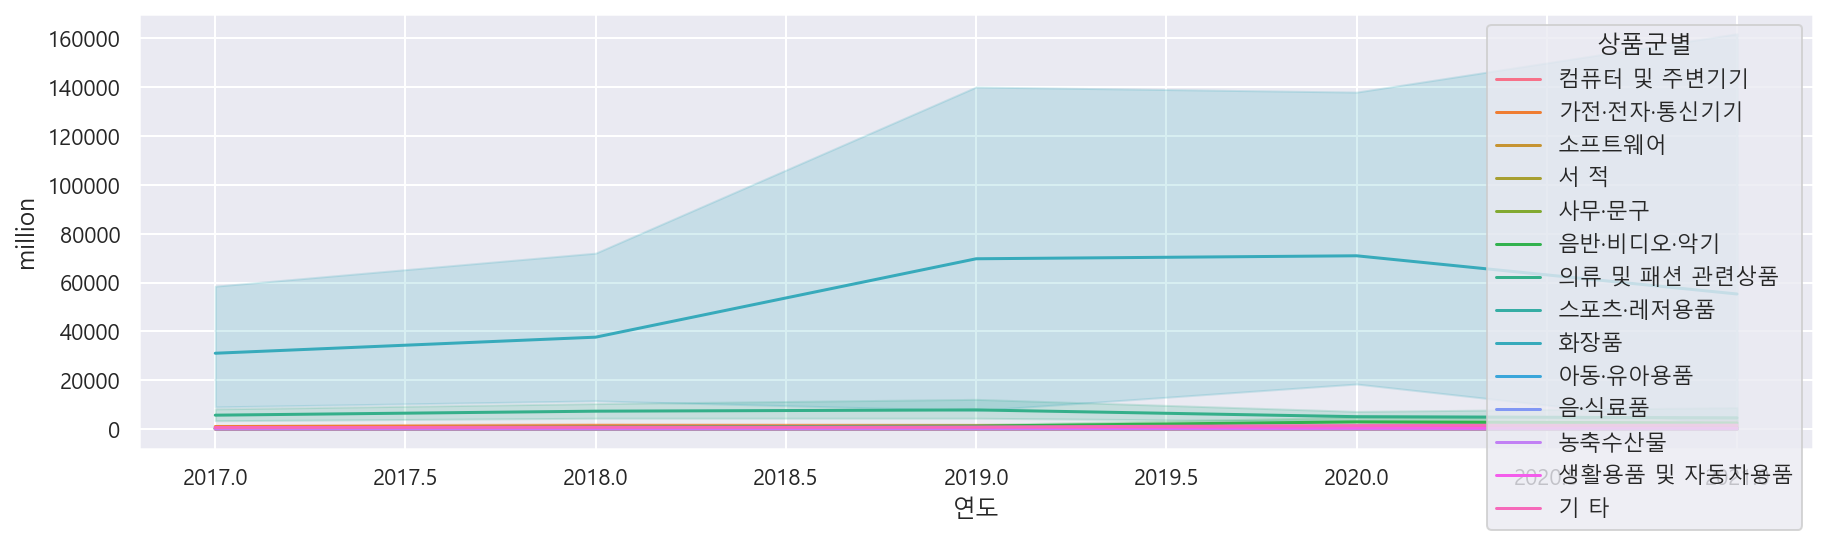

In [64]:
plt.figure(figsize=(15, 4))
저장할이미지1 = sns.lineplot(x="연도", y="million", data=df, hue="상품군별")

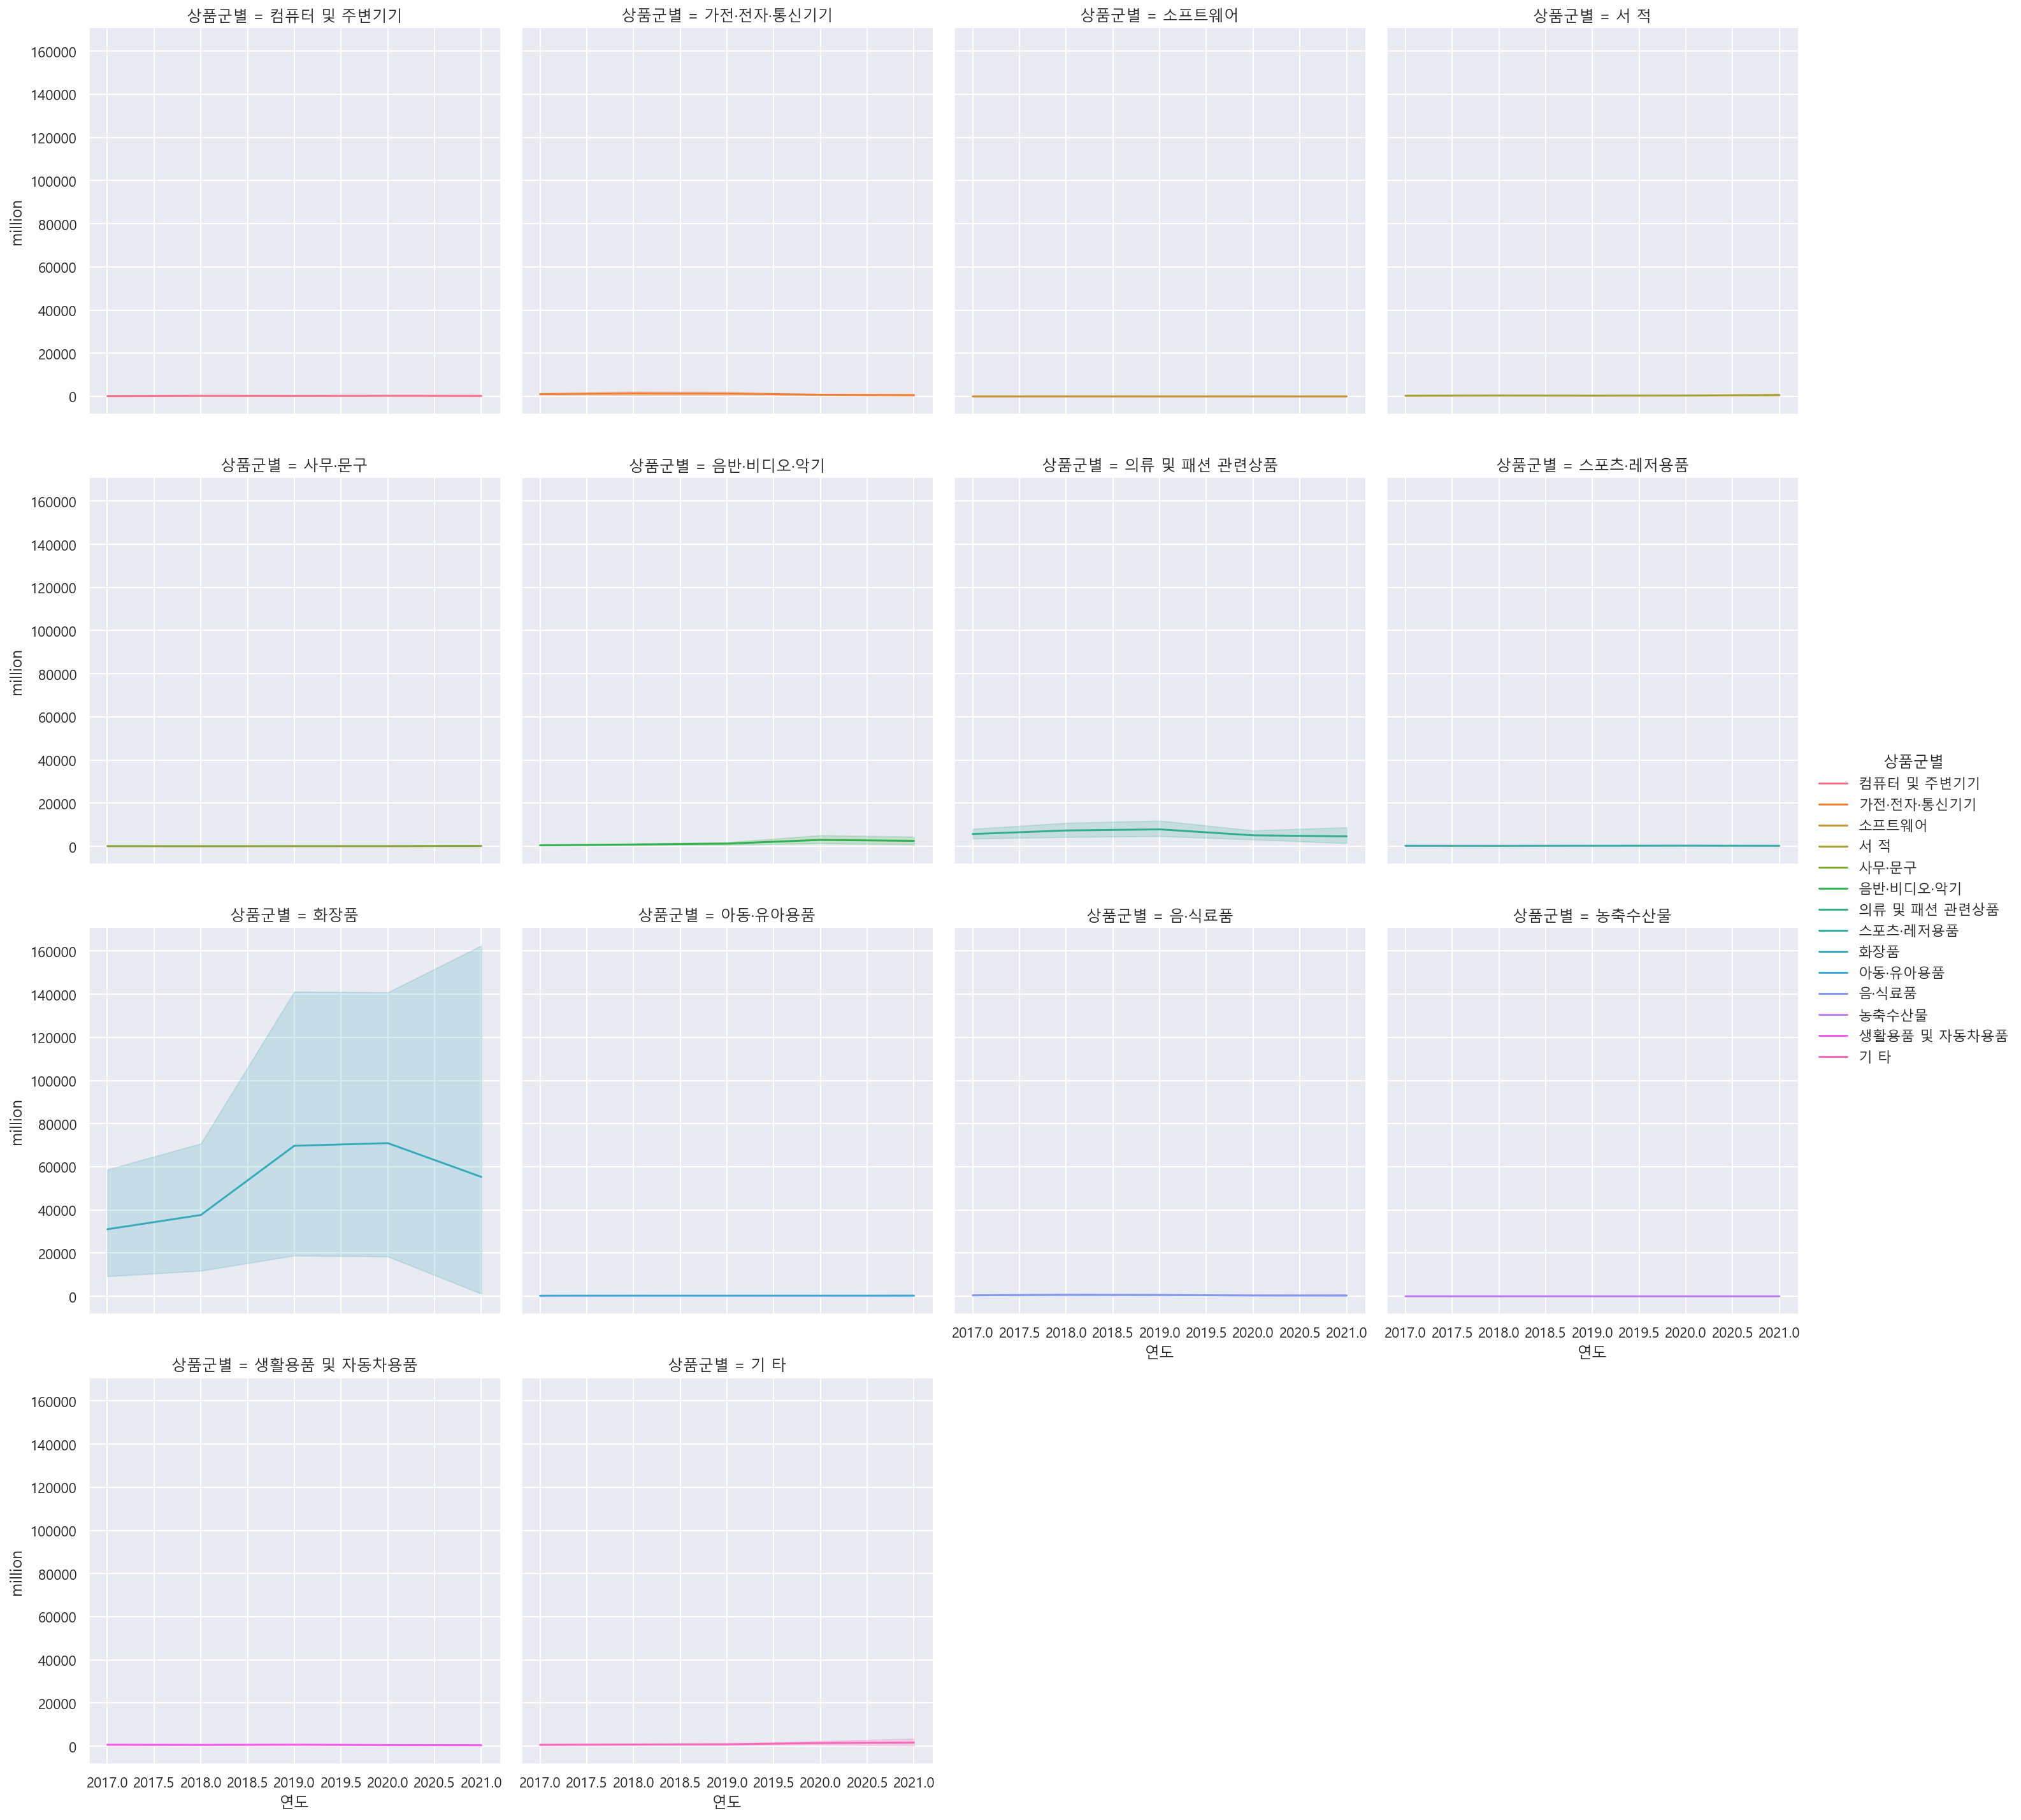

In [65]:
저장할이미지2 = sns.relplot(x="연도", y="million", data=df, hue="상품군별", col="상품군별", col_wrap=4, kind="line")

In [45]:
df.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '기간', 'million', '연도', '분기'], dtype='object')

In [44]:
df_sub =  df[~df["상품군별"].isin(["화장품"])]
df_sub

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
49,미국,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014.1/4,NaN,2014,1
52,미국,가전·전자·통신기기,면세점,2014.1/4,NaN,2014,1
53,미국,가전·전자·통신기기,면세점 이외,2014.1/4,NaN,2014,1
55,미국,소프트웨어,면세점,2014.1/4,NaN,2014,1
...,...,...,...,...,...,...,...
13043,기타,농축수산물,면세점 이외,2021.1/4,1.0,2021,1
13045,기타,생활용품 및 자동차용품,면세점,2021.1/4,0.0,2021,1
13046,기타,생활용품 및 자동차용품,면세점 이외,2021.1/4,343.0,2021,1
13048,기타,기 타,면세점,2021.1/4,0.0,2021,1


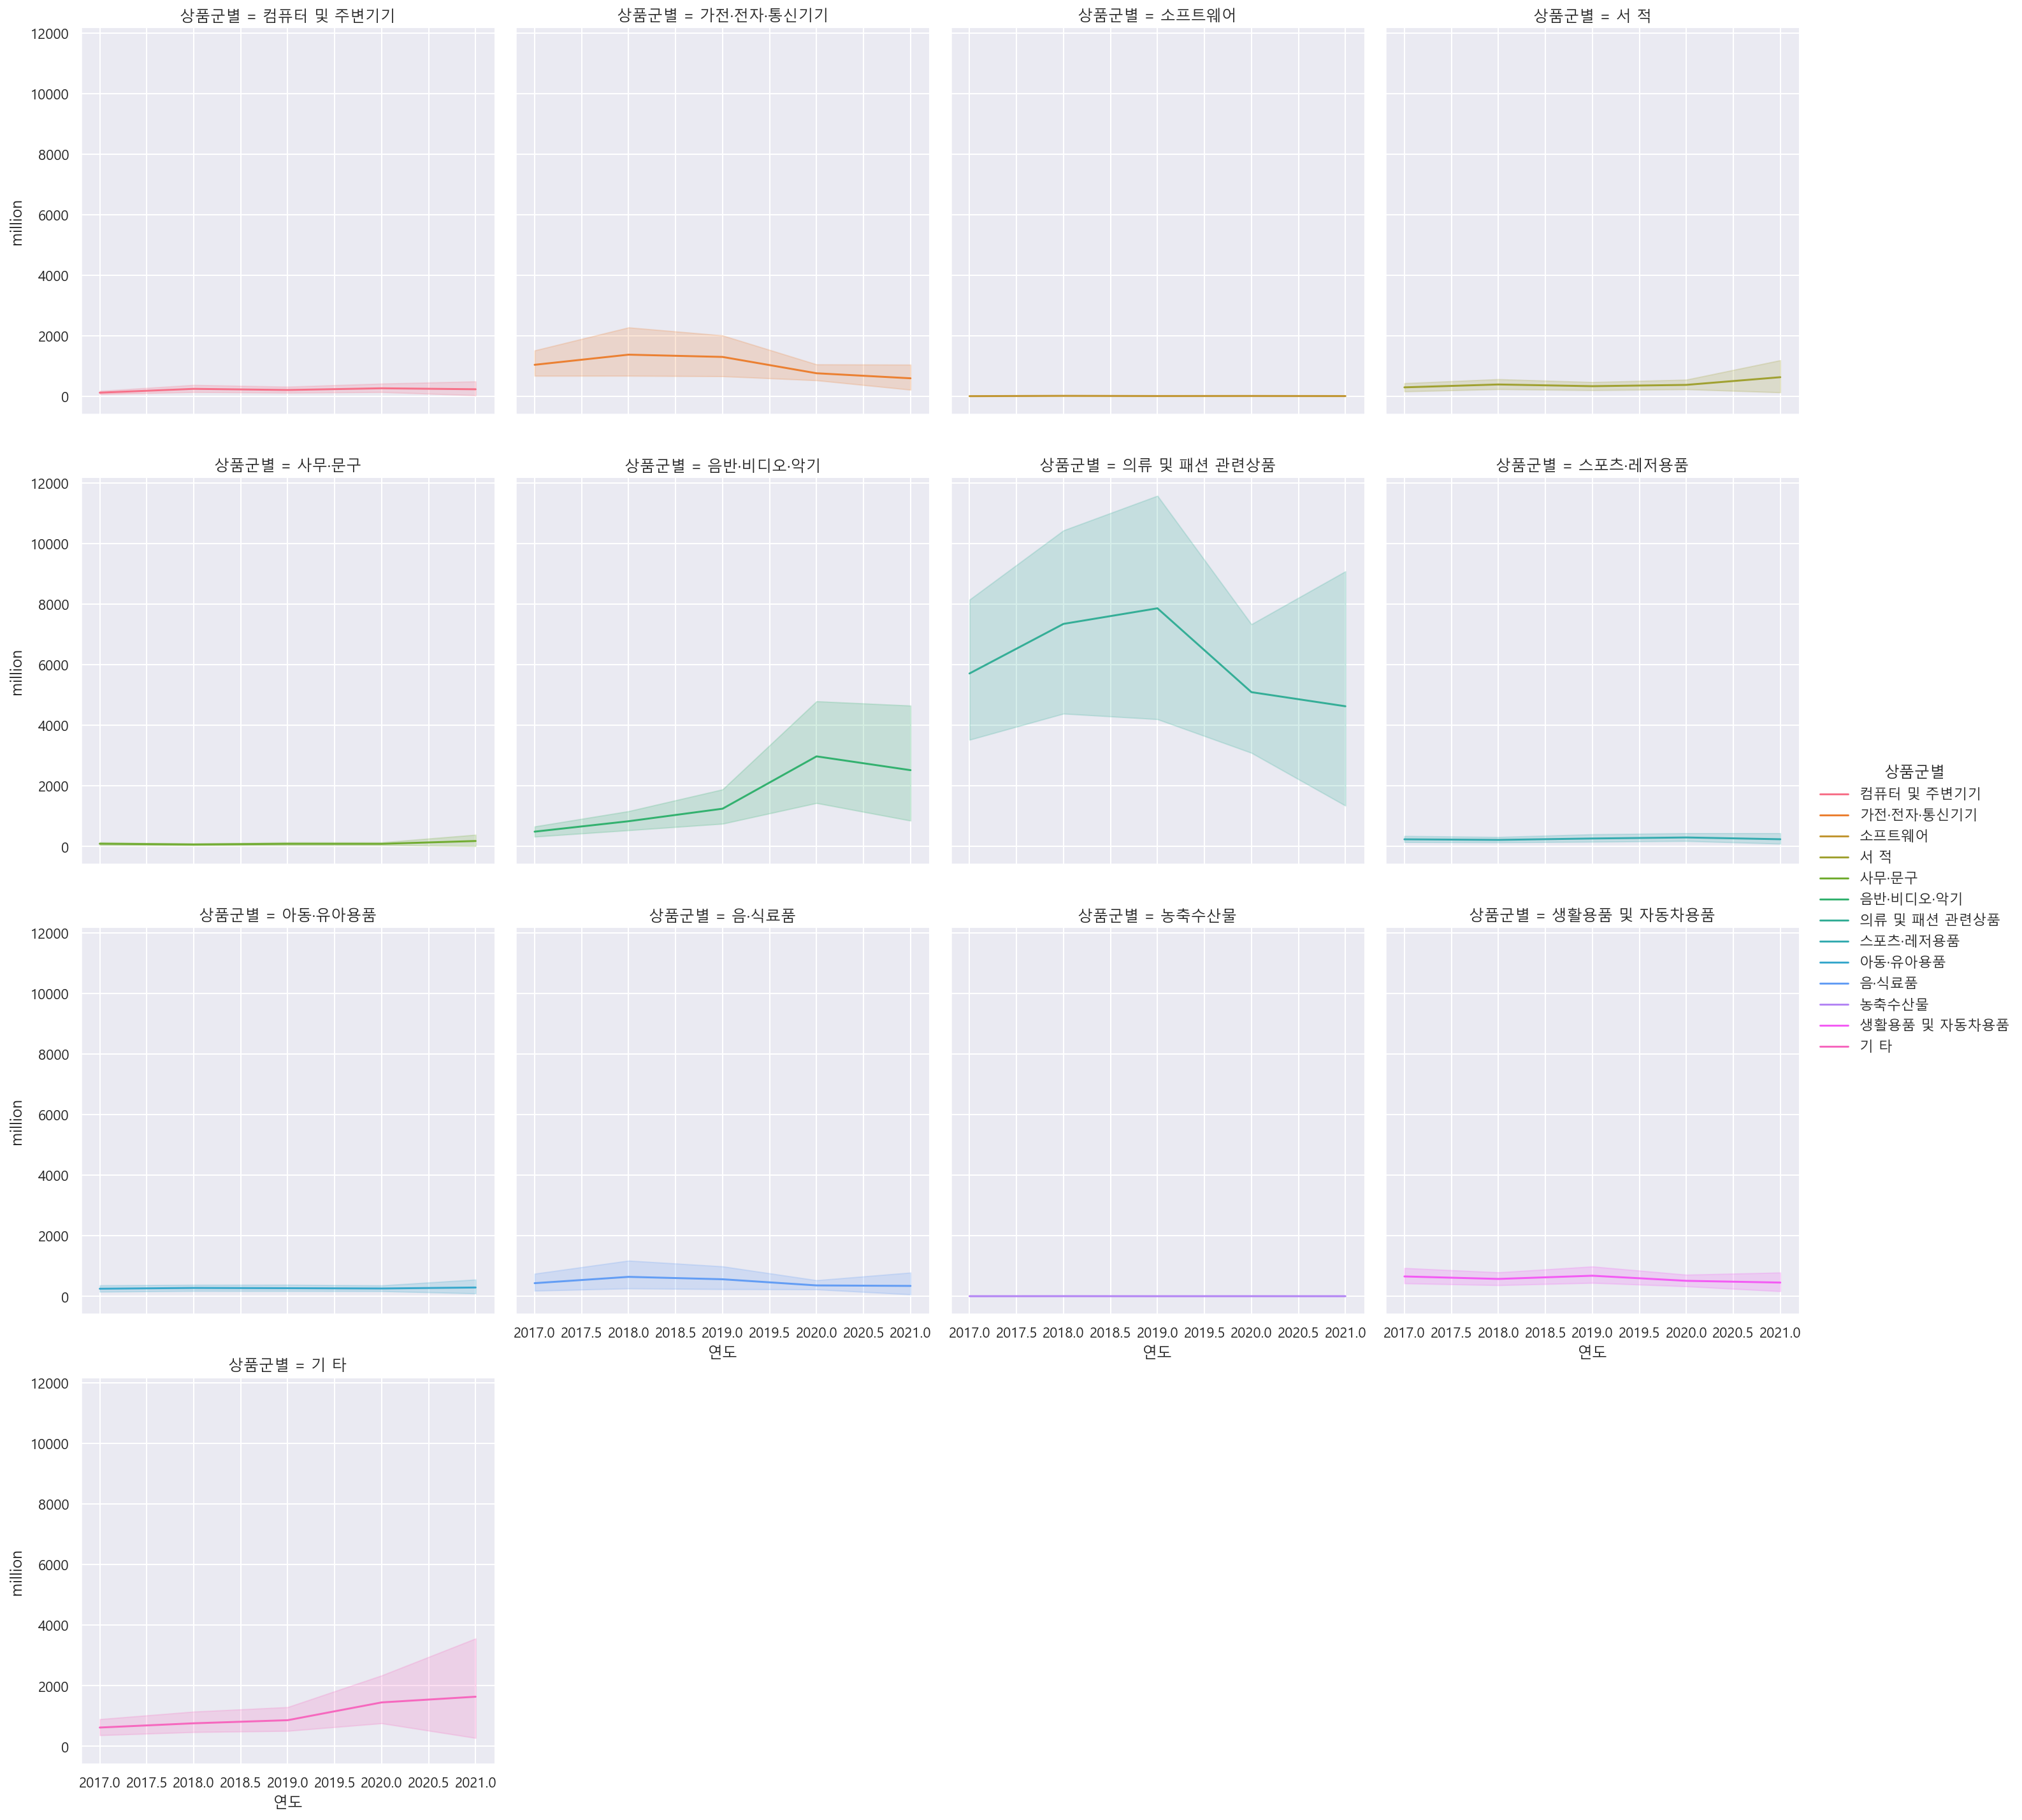

In [66]:
저장할이미지3 = sns.relplot(x="연도", y="million", data=df_sub, 
            hue="상품군별", col="상품군별", col_wrap=4, kind="line")

<AxesSubplot:xlabel='연도', ylabel='million'>

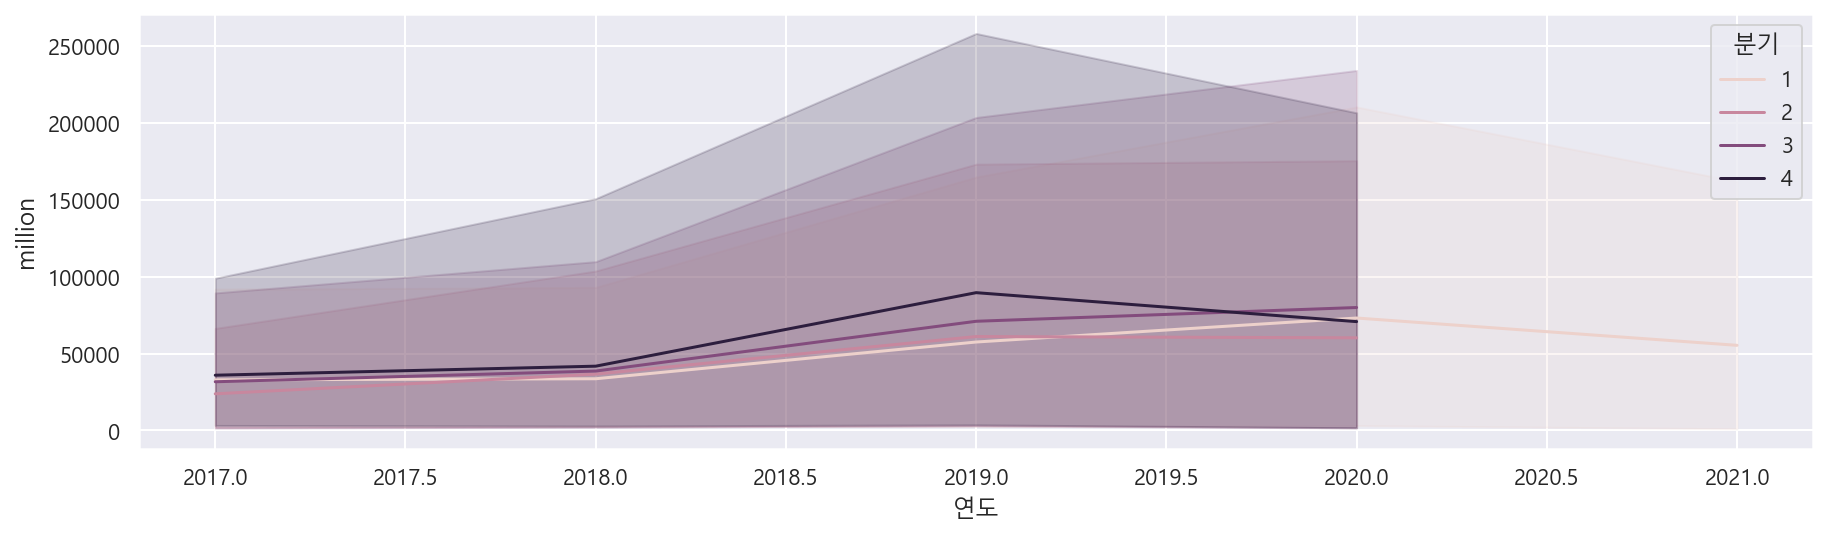

In [47]:
df_cosmetic = df[(df["상품군별"] == "화장품")]
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_cosmetic, x="연도", y="million", hue="분기")

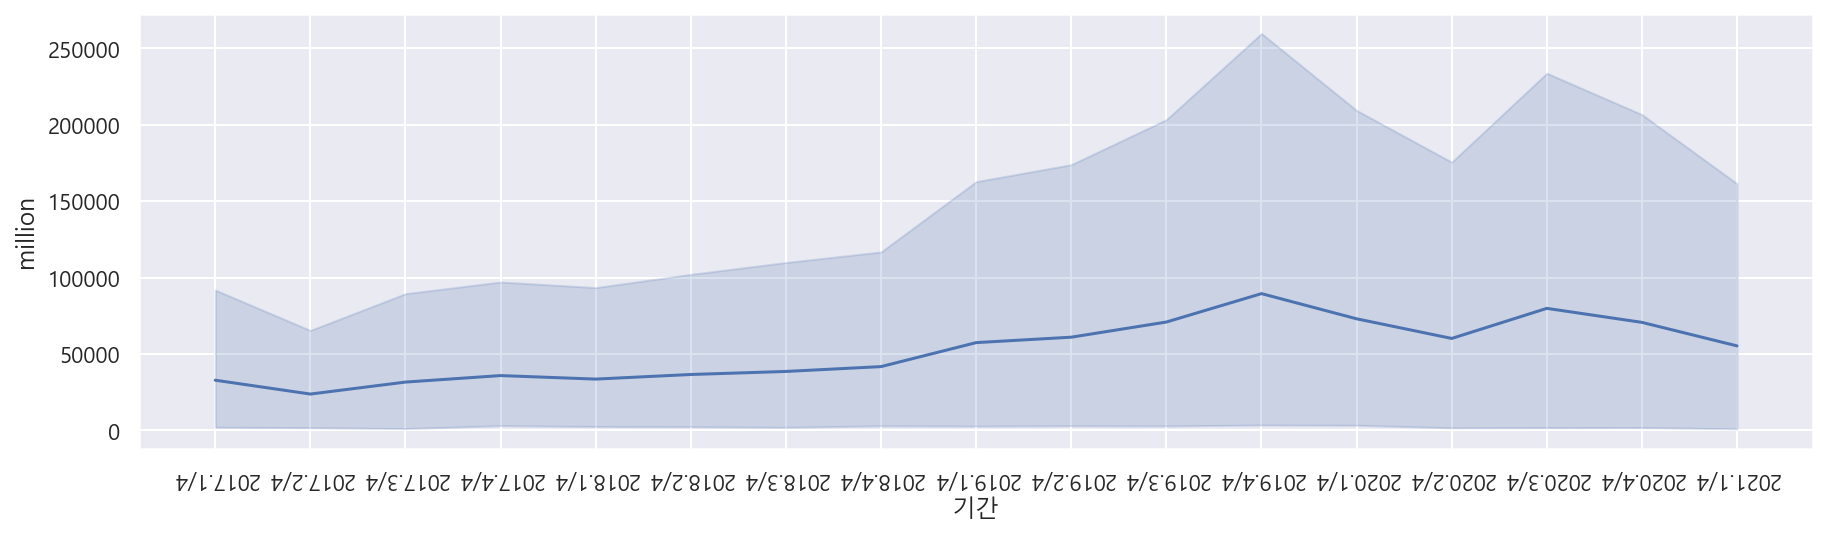

In [67]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=180)
저장할이미지4 = sns.lineplot(data=df_cosmetic, x="기간", y="million")

<AxesSubplot:xlabel='기간', ylabel='million'>

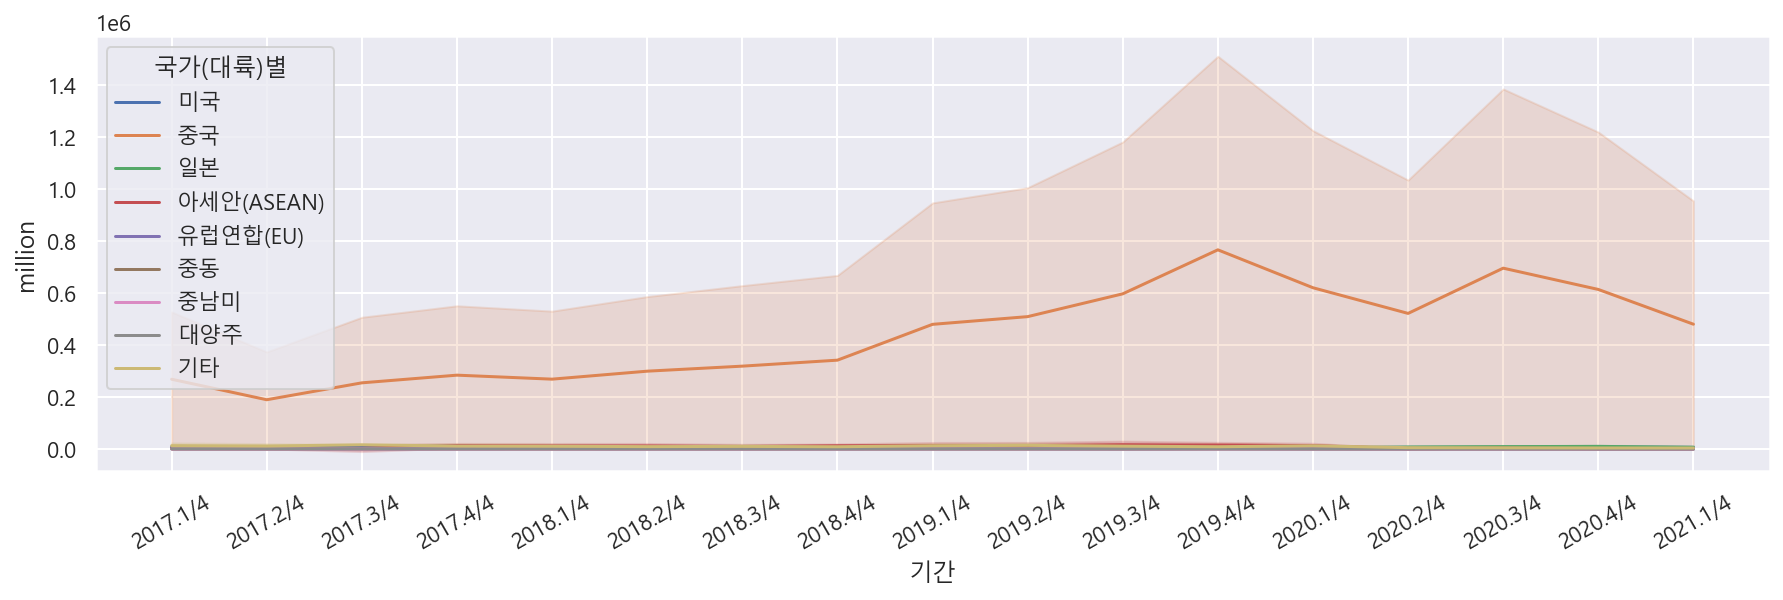

In [50]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
저장할이미지5 = sns.lineplot(data=df_cosmetic, x="기간", y="million", hue="국가(대륙)별")

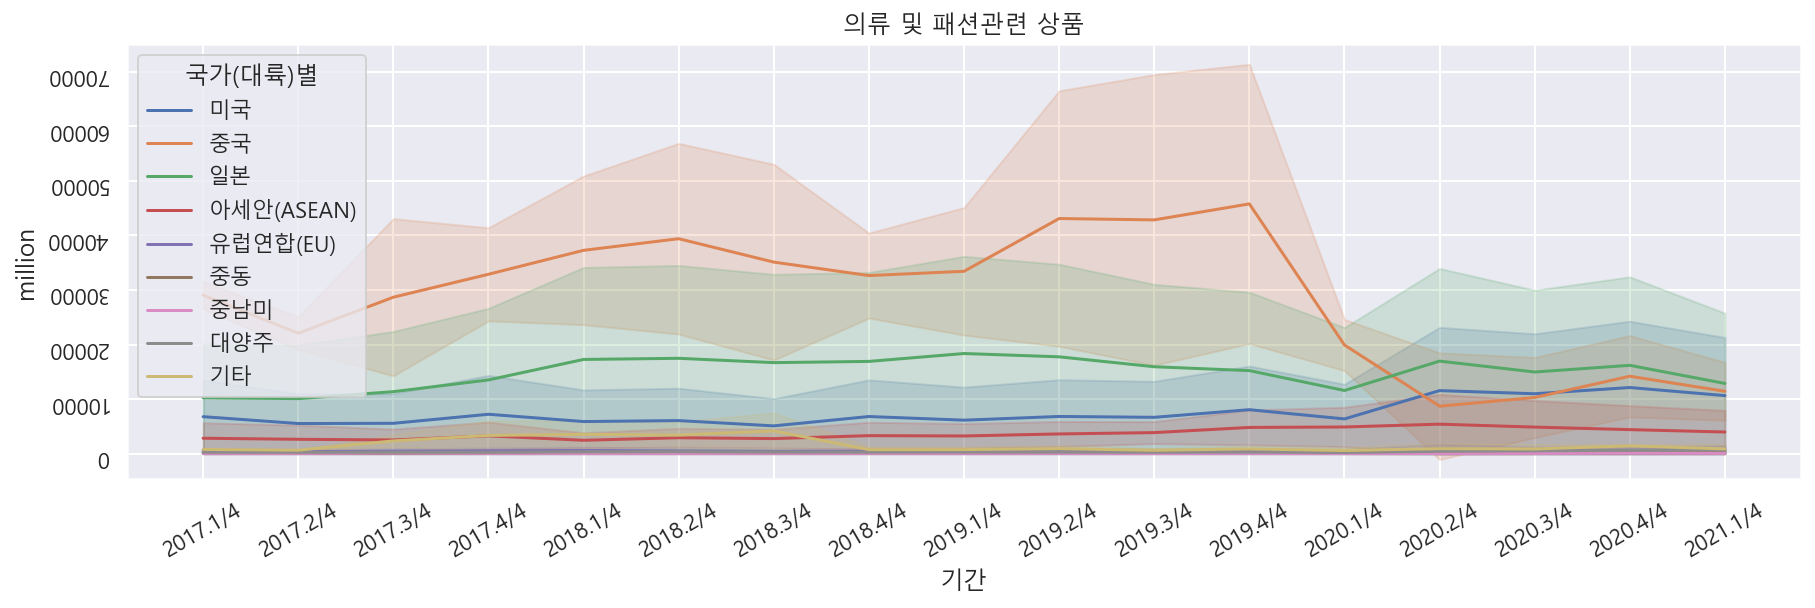

In [68]:
df_fashion = df[df["상품군별"].str.contains("의류")]
plt.figure(figsize=(15, 4))
plt.title("의류 및 패션관련 상품")
plt.xticks(rotation=30)
plt.yticks(rotation=180)

저장할이미지6 = sns.lineplot(data=df_fashion, x="기간", y="million", hue="국가(대륙)별")

<AxesSubplot:xlabel='기간', ylabel='million'>

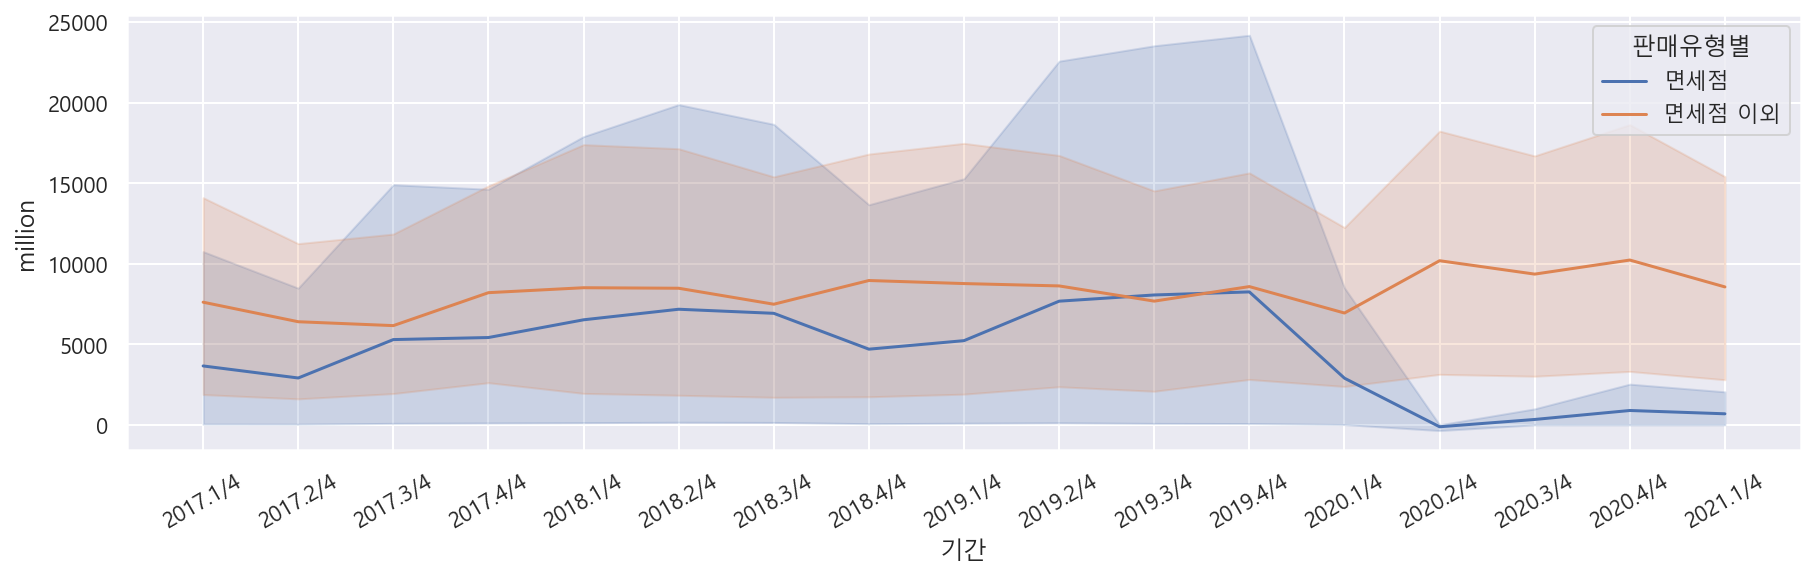

In [53]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
저장할이미지7 = sns.lineplot(data=df_fashion, x="기간", y="million", hue="판매유형별")

In [54]:
pivot = df_fashion.pivot_table(
    index="국가(대륙)별", values="million", 
    columns="연도", aggfunc="sum")
pivot

연도,2014,2015,2016,2017,2018,2019,2020,2021
국가(대륙)별,,,,,,,,
기타,0.0,0.0,0.0,14387.0,23901.0,6475.0,7807.0,1796.0
대양주,0.0,0.0,0.0,2266.0,2725.0,2489.0,3749.0,1395.0
미국,0.0,0.0,0.0,50353.0,47875.0,55536.0,82207.0,21317.0
아세안(ASEAN),0.0,0.0,0.0,22671.0,23068.0,31247.0,39339.0,7983.0
유럽연합(EU),0.0,0.0,0.0,3736.0,4114.0,3694.0,5128.0,1498.0
일본,0.0,0.0,0.0,90584.0,136800.0,134637.0,119531.0,25776.0
중국,0.0,0.0,0.0,225407.0,288848.0,330267.0,106346.0,22905.0
중남미,0.0,0.0,0.0,762.0,576.0,544.0,614.0,154.0
중동,0.0,0.0,0.0,772.0,879.0,951.0,1776.0,412.0


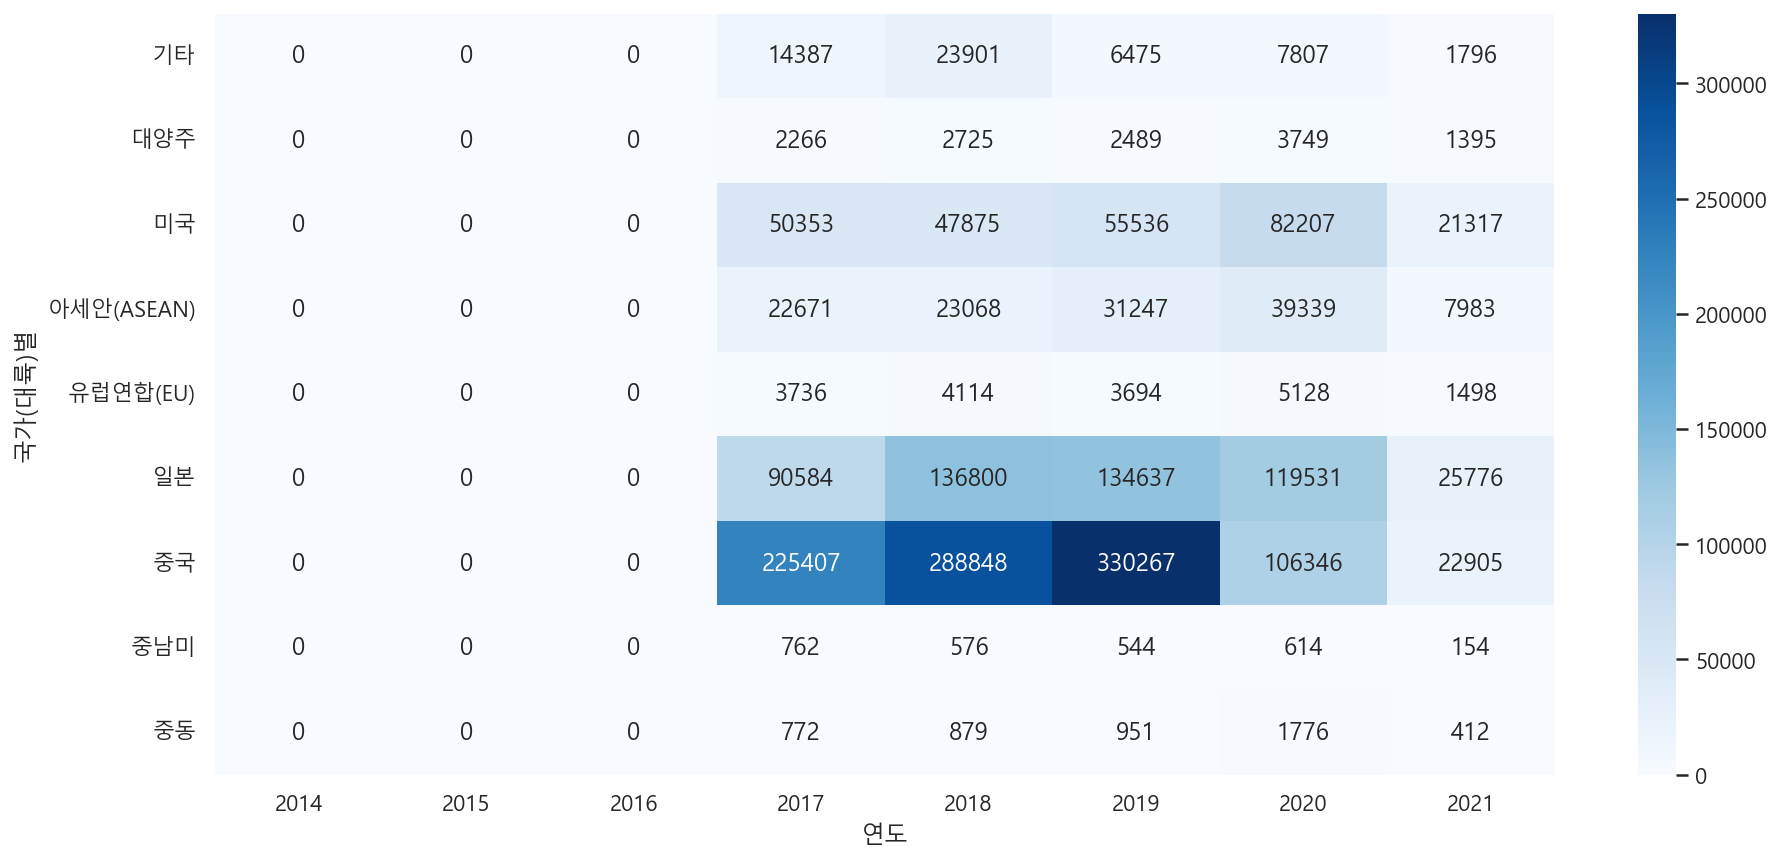

In [86]:
plt.figure(figsize=(15, 7))
저장할이미지8 = sns.heatmap(pivot, cmap="Blues", annot=True, fmt=".0f")

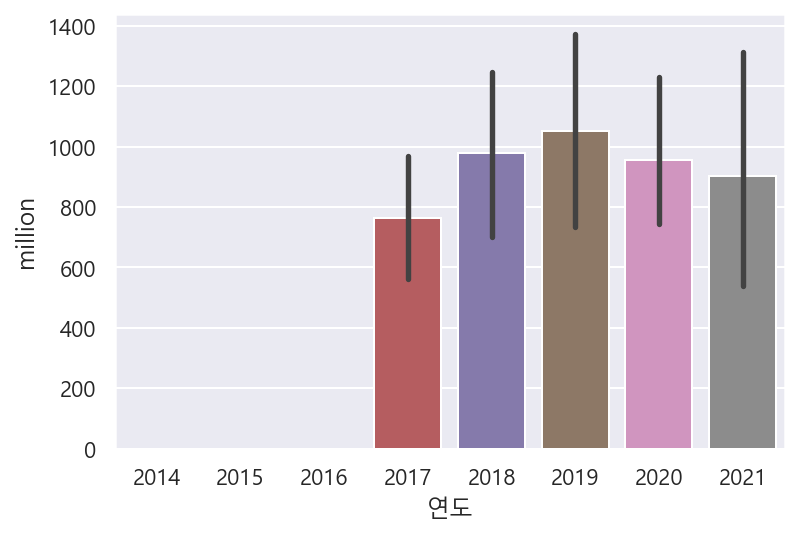

In [69]:
저장할이미지9 = sns.barplot(x="연도", y="million", data=df_sub)

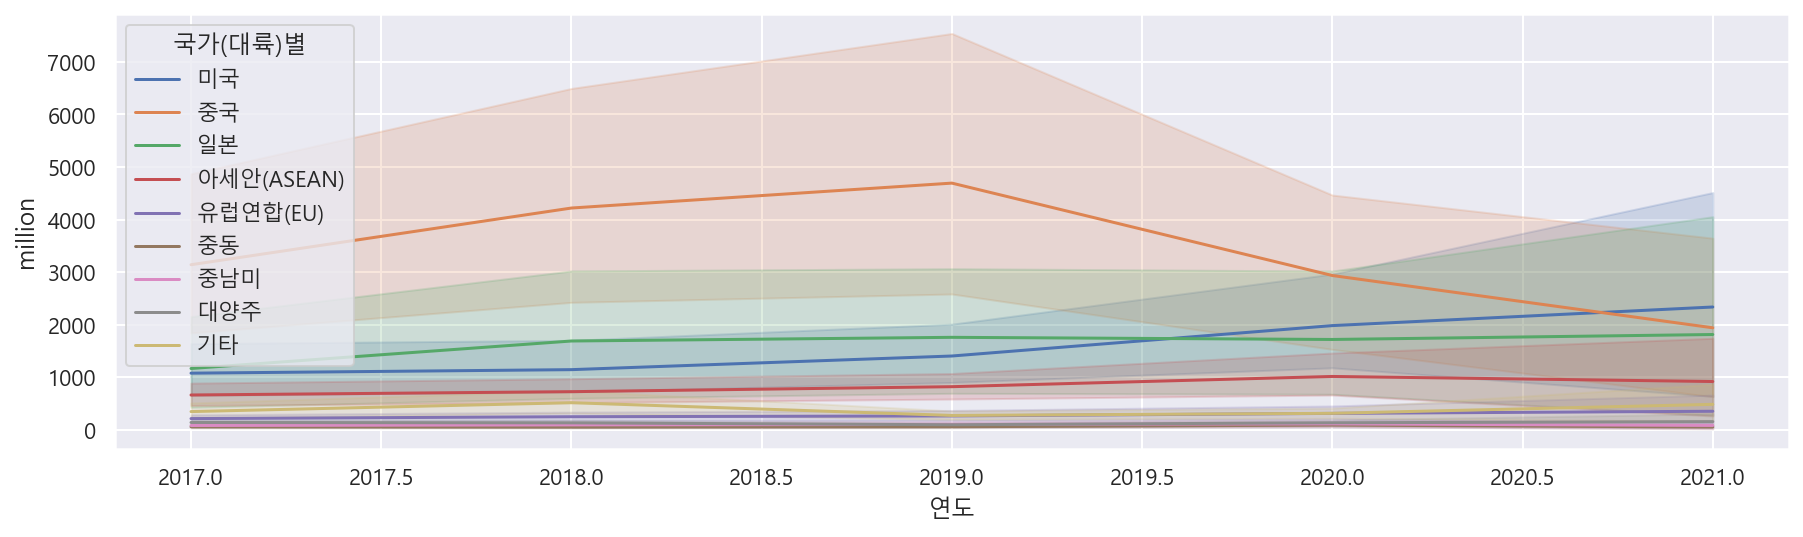

In [70]:
plt.figure(figsize=(15, 4))
저장할이미지10 = sns.lineplot(x="연도", y="million", data=df_sub, hue="국가(대륙)별")

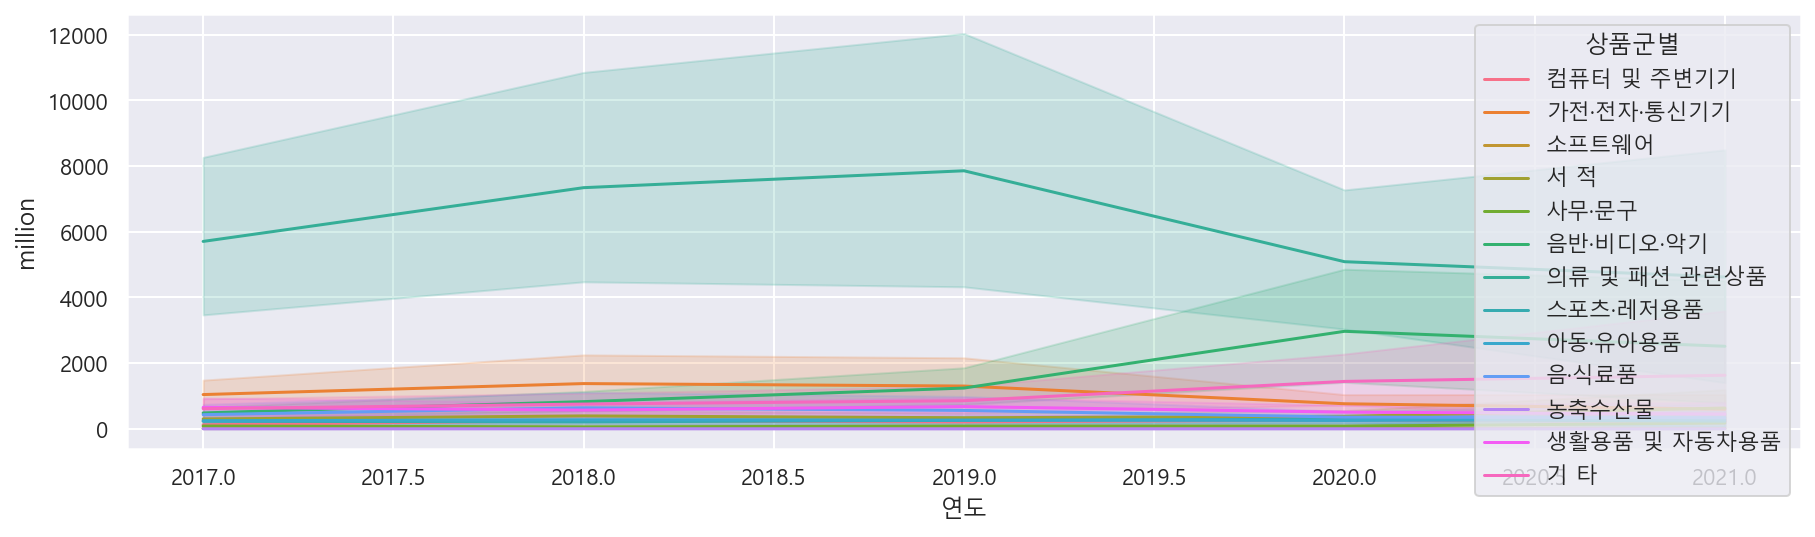

In [83]:
plt.figure(figsize=(15, 4))
저장할이미지1 = sns.lineplot(x="연도", y="million", data=df_sub, hue="상품군별")

In [89]:
import sys
# plt.show()
# plt.savefig('케이뷰티보고서.png')

# 저장할보고서 = sns.lineplot(x="연도", y="million", data=df_sub, hue="상품군별")

fig = 저장할이미지1.get_figure()
fig.savefig("케이뷰티보고서1000.png") 


def stoc(classname):
    return getattr(sys.modules[__name__], classname)

# fig = f'저장할이미지{i+1}'.get_figure()


for i in range(0, 15):
    try:
        fig = stoc(f'저장할이미지{i+1}').get_figure()
        fig.savefig(f"케이뷰티보고서{i+1}.png") 
    except:
        pass

'FacetGrid' object has no attribute 'get_figure'
'FacetGrid' object has no attribute 'get_figure'
module '__main__' has no attribute '저장할이미지5'
module '__main__' has no attribute '저장할이미지7'
module '__main__' has no attribute '저장할이미지11'
module '__main__' has no attribute '저장할이미지12'
module '__main__' has no attribute '저장할이미지13'
module '__main__' has no attribute '저장할이미지14'
module '__main__' has no attribute '저장할이미지15'
